# Stanford CME 241 (Winter 2021) - Assignment 5
## Implemeting FunctionApprox

### Chih-Hsuan 'Carolyn' Kao (chkao831@stanford.edu)
### Mar 8th, 2021

### Apapted from interface at https://github.com/TikhonJelvis/RL-book/blob/master/rl/function_approx.py

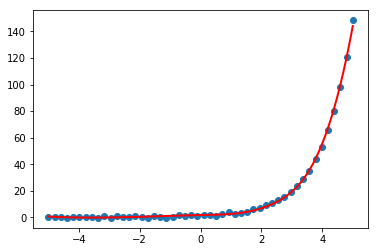

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

x = np.linspace(-5, 5, 50)
y = np.exp(x) + 0.5 * np.random.randn(50)
plt.plot(x, y, 'o')

spl = UnivariateSpline(x, y)
xs = np.linspace(-5, 5, 100)
plt.plot(xs, spl(xs), 'red', lw=2)

plt.show()

### Implement a form of FunctionApprox (try implementing Univariate B-Spline)

In [ ]:
import sys
sys.path.append('/Users/chih-hsuankao/Desktop/CME241/RL-book/')

from rl.function_approx import FunctionApprox

In [ ]:
from dataclasses import dataclass, field
from typing import Iterable, Tuple, Optional, TypeVar

In [ ]:
@dataclass(frozen=True)
class UnivariateSplineApprox(FunctionApprox[float]):
    
    B_spline: UnivariateSpline = field(default=None, init=False, repr=False)
    
    def representational_gradient(self, x_value: float) -> UnivariateSplineApprox[float]:

        return self.B_spline.derivative(x)[0]
    
    def evaluate(self, x_values_seq: Iterable[float]) -> np.ndarray:
        
        return np.array([self.B_spline(x) for x in x_values_seq])
    
    def update(self, xy_vals_seq: Iterable[Tuple[float, float]]) -> UnivariateSplineApprox[float]:

        x, y = zip(*xy_vals_seq)
        self.B_spline = UnivariateSpline(x, y)
        
        return self
    
    def solve(self, 
              xy_vals_seq: Iterable[Tuple[float, float]], 
              error_tolerance: Optional[float] = None) -> UnivariateSplineApprox[float]:
        
        return self.update(xy_vals_seq)
    
    def within(self, other: UnivariateSplineApprox[float], tolerance: float = 1e-8) -> bool:
        
        knots = self.B_spline.get_knots()
        coeffs = self.B_spline.get_coeffs()
        
        if isinstance(other, UnivariateSplineApprox):
            return all(
                np.abs(knots - other.B_spline.get_knots() <= tolerance).item()
                and
                np.abs(coeffs - other.B_spline.get_coeffs() <= tolerance).item()
            )
        return False